<a href="http://www.unioeste.br"><img src="https://www5.unioeste.br/portalunioeste/templates/tlpcampus/images/logoUnioeste.png" align="right"></a>

<h1><center>Atividade Prática em R - Coeficientes de Assimetria e Curtose, Quantis e Box Plot</center></h1>

<center>Prof.Dr. Plinio Andrade</center>

Nesta atividade prática você aprenderá a utilizar o R para:

* calcular e interpretar os coeficientes de **assimetria** e **curtose** (que não foram apresentados nas aulas);
* calcular quantis amostrais de qualquer ordem;
* plotar gráficos de quantis;
* plotar box plots.

<b> <font color='red'>ATENÇÃO!</font></b> sempre que este arquivo for reaberto você deverá executar todas as células de código novamente. Cada célula ativa é executada pressionando o botão <b>Run</b> no menu ou teclando <b>Ctrl+Enter</b> (persistindo dúvidas, assista a videoaula de apresentação sobre notebooks).

Caso necessite criar mais células de código, basta ir ao menu Insert.

***

## 1) Sobre os dados

Novamente, utilizaremos nesta prática os dados de Bussab & Morettin (2006). Vamos armazená-los na memória executando a célula a seguir:

In [ ]:
arquivo = url('https://www.ime.usp.br/~pam/dados.RData')
load(arquivo)

In [ ]:
attach(tab2_1) # tornando as colunas da tabela 2.1 acessíveis pelos seus respectivos nomes

***
## 2) Coeficiente de assimetria e curtose
O conceito de simetria da distribuição dos dados foi apresentado em aula. Vamos definir e calcular com o auxílio do R uma medida que quantifica essa simetria. Vamos também definir um novo conceito chamado **curtose**, que também tem relação com a forma da distribuição dos dados. Primeiramente, vamos definir alguns objetos importantes.

Sejam $x_1,x_2,\ldots,x_n$ um conjunto de dados sobre a variável $X$. Defina

$$m_2=\frac{1}{n}\sum_{i=1}^n (x_i-\bar{x})^2, \ \ \ \mbox{(variância dos dados)}$$

em que $\bar{x}=\frac{1}{n}\sum_{i=1}^n x_i$ é a média amostral. Defina também a seguinte **padronização** dos dados

$$z_i=\frac{x_i-\bar{x}}{\sqrt{m_2}} \ \ \ (\mbox{para }i=1,2,\ldots,n).$$

### 2.1) Coeficiente de assimetria
O **coeficiente de assimetria amostral**, denotado por $b_1$, é definido por:

$$b_1=\frac{1}{n}\sum_{i=1}^n z_i^3.$$

Devemos interpretar o coeficiente de assimetria como segue:

* Se a distribuição dos dados for assimétrica à **direita** (ou positiva), devemos ter $b_1>0$;
* se a distribuição dos dados for assimétrica à **esquerda** (ou negativa), devemos ter $b_1<0$;
* se a distribuição dos dados for simétrica (aproximadamente), devemos ter $b_1\approx 0$.

Tal função **não** está implementada no R. A célula a seguir contém uma função implementada para calcular o coeficiente de assimetria, execute-a para poder prosseguir:

In [ ]:
# Função para calcular o coeficiente de assimetria
assimetria <- function(x)
{
   x  = na.omit(x)
   m2 = mean((x-mean(x))^2)
   z  = (x-mean(x))/sqrt(m2)
   b1 = mean(z^3)
   return(b1)
}

O histograma da variável **salário** obtido na atividade prática anterior sugere que a distribuição desses dados possui assimetria à direita. Vamos verificar isso calculando o coeficiente de assimetria com a função implementada. Execute a célula a seguir:

In [ ]:
s = salario   # carregando os dados da variável salário no vetor "s"
assimetria(s) # calculando o coeficiente de assimetria de s

***
### Exercício 1
Obtenha o coeficiente de assimetria das variáveis **idade** (em anos) e **número de filhos**. Nas primeiras duas células introduza o cálculo do coeficiente para cada variável e nas duas últimas células escreva sobre a sua decisão quanto à simetria ou assimetria da distribuição de cada variável.
***

In [ ]:
# Cálculo do coef. de assimetria para a variável idade


In [ ]:
# Cálculo do coef. de assimetria para a variável número de filhos


Escreva após o símbolo "#" na célula a seguir a sua resposta quando a simetria da variável **idade** (em anos):

In [ ]:
#

Escreva após o símbolo "#" na célula a seguir a sua resposta quando a simetria da variável **número de fihos**:

In [ ]:
#

### 2.2) Coeficiente de curtose
O **coeficiente de curtose**, excesso de curtose ou achatamento, mede o quanto a distribuição dos dados é concentrada ou dispersa em torno de uma medida de posição central. Tal medida também está relacionada com o *peso da cauda* da distribuição dos dados, isto é, o quão propensa a distribuição dos dados é na geração de valores extremos (valores muito distantes de onde a maioria das observações se concentram - "outliers"). Dados os valores de $z_1,z_2,\ldots,z_n$ definidos em (6.1), este coeficiente é dado por:

$$b_2=\left(\frac{1}{n}\sum_{i=1}^n z_i^4\right) - 3.$$


A curtose é classificada em três tipos quando ao valor de $b_2$:

* Se $b_2<0$, dizemos que a distribuição dos dados possui caudas mais leves que as da distribuição normal$^*$ (**Platicúrtica**).
* Se $b_2\approx 0$, dizemos que a distribuição dos dados possui caudas aproximadamente iguais as da distribuição normal (**Mesocúrtica:**). 
* Se $b_2>0$, dizemos que a distribuição dos dados possui caudas mais pesadas que as da distribuição normal (**Leptocúrtica:**).

$^*$ Vamos conhecer a **distribuição normal de probabilidades** na segunda parte da disciplina, mas podemos interpretar a curtose graficamente:


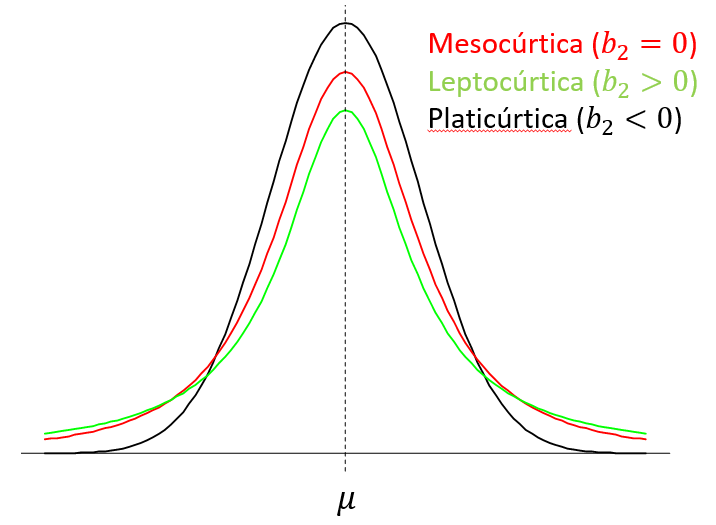


A célula a seguir contém uma função implementada para calcular o coeficiente de curtose, execute-a para poder prosseguir:

In [ ]:
# Função para calcular o coeficiente de curtose
curtose <- function(x)
{
   x  = na.omit(x)
   m2 = mean((x-mean(x))^2)
   z  = (x-mean(x))/sqrt(m2)
   b2 = mean(z^4) - 3
   return(b2)   
}

***
### Exercício 2
Obtenha o coeficinte de curtose da variável **salário**. Você consegue interpretar o valor obtido?
***

In [ ]:
# Utilize essa célula para calcular a curtose


In [ ]:
# Escreva a sua interpretação após o símbolo # abaixo
#

***
## 3) Quantis
Nesta etapa você aprenderá a calcular **quantis** de qualquer ordem, obter o **diagrama dos cinco números**, plotar **gráficos de quantis** e construir **boxplots**.

### 3.1) Cálculo de quantis e diagrama dos cinco números
A função quantile() é utilizada para calcular quantis de ordem $p$ no R. No primeiro argumento da função informamos a variável e no segundo o valor de $p$. Vamos calcular o quantil de ordem 0,25 da variável **salário**. Execute a célula a seguir: 

In [ ]:
quantile(s,0.25)

Observe que o quantil de ordem 0,50 coincide com a mediana. Execute a célula a seguir:

In [ ]:
quantile(s,0.5) # quantil de ordem 0,5
median(s)       # mediana

O **diagrama dos cinco números** visto em aula é obtido facilmente no R por meio da funcão summary(). Na verdade o R fornece seis valores, pois informa também a média. Execute a célula a seguir para obter este diagrama para a variável **salário**:

In [ ]:
summary(s)

### 3.2) Gráfico de quantis
Para obter gráficos de quantis, devemos primeiro criar uma sequência de valores de $p$ no intervalo $[0,1]$ e que serão dispostos no eixo das abscissas do gráfico. Execute a célula a seguir:

In [ ]:
# Criando uma sequência de proporções que começa em 0 e termina em 1 com saltos de tamanho 0,05
# Tal sequência será armazenada no vetor "props"
props = seq(0,1,0.05)
props

Vamos agora calcular os quantis correspondentes para a variável **salário** e armazená-los no vetor "quant". Execute a célula a seguir:

In [ ]:
quant = quantile(s,props)
quant

Agora podemos criar o gráfico por meio da função plot() Execute a célula a seguir:

In [ ]:
plot(props, quant) # valores em x como props e valores em y como quant

***
### Exercício 3
Construa um gráfico de quantis para a variável **idade (em anos)**.
***

***
## 4) Box plot
Como na construção do histograma, o R fornece uma função simples para obtenção do **box plot**. Vamos construir um box plot para a variável **salário**. Execute as células a seguir:

In [ ]:
# box plot tradicional na vertical
boxplot(s)

In [ ]:
# box plot na horizontal
boxplot(s, horizontal = TRUE)

Para comparar box plots, basta adicionar as variáveis no argumento da função. Por exemplo, vamos comparar a variável **salário** com a variável **idade (em anos)**. Para isso, devemos **padronizar** as variáveis, pois as mesmas possuem escalas diferentes. Dados $x_1,x_2,\ldots,x_n$, dados de uma variável $X$, uma possível padronização é dada por:

$$z_i =\frac{x_i-\bar{x}}{\mbox{dp}(x)}, \ \ (i=1,2,\ldots,n),$$

onde $\mbox{dp}(x)$ é o desvio padrão dos dados. A padronização acima também é dita **normalização** dos dados, e faz com que estes fiquem com média 0 e desvio padrão 1. Execute a célula a seguir:

In [ ]:
id = tab2_1$idade_anos      # armezenando os dados da variável idade (em anos) num vetor id

s_p = (s-mean(s))/sd(x)     # padronização da variável salário

id_p = (id-mean(id))/sd(id) # padronização da variável idade (em anos)

boxplot(s_p, id_p)

***
### Exercício 4
Em aula, contruímos um box plot para os dados sobre as populações dos 15 municípios mais populosos do Brasil. Os dados completos (30 municípios) encontram-se na tabela "cd_municipios" que faz parte dos dados carregados na memória no início dessa atividade prática. Acesse esses dados e utilizando uma célula para cada item:

* (a) Obtenha um diagrama dos cinco números e a média.
* (b) Calcule a variância e o desvio padrão.
* (c) Obtenha o Histograma.
* (d) Obtenha um gráfico de quantis
* (e) Obtenha o box plot.
* (f) Interprete os resultados.
***

In [ ]:
# Obtenha aqui o diagrama dos cinco números e a média


In [ ]:
# Calcule aqui a variância e o desvio padrão


In [ ]:
# Faça aqui seu histograma


In [ ]:
# Faça aqui seu gráfico de quantis


In [ ]:
# Faça aqui seu boxplot


In [ ]:
# Escreva após o simbolo # sua interpretação dos resultados
#

***
## Parabéns, você concluiu esta atividade prática!

<b> <font color='red'>ATENÇÃO! Sugiro imprimir o conteúdo deste notebook para enventuais consultas futuras, pois assim que o navegador for fechado os códigos serão apagados. Para imprimir, tecle Ctrl+P e salve como um arquivo PDF.</font></b>